# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]
(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


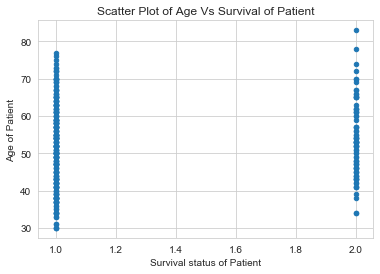

In [39]:
#Analysis on Haberman's Data set

#objective - Who is more likely to survive?

#Attributes

#age - Attribute
#year - Attribute
#nodes - Attribute
#status - Class attribute - 1 survived 5 years or longer - Yes
#                           2 died within 5 years - No
#data points 
#306
#imbalanced data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cancer = pd.read_csv("haberman.csv")

print(cancer)
print(cancer.shape)
print(cancer.columns)
cancer["status"].value_counts()

#2D scatter Plot
cancer.plot(kind='scatter' , x = 'status' , y = 'age' )
plt.ylabel('Age of Patient')
plt.xlabel('Survival status of Patient')
plt.title('Scatter Plot of Age Vs Survival of Patient')

plt.show()

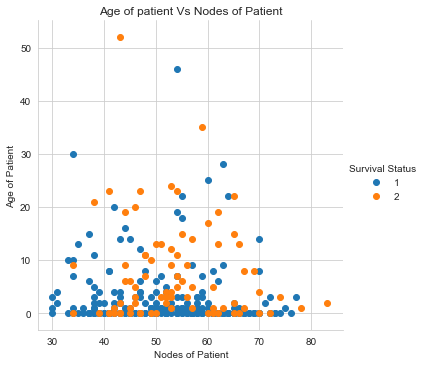

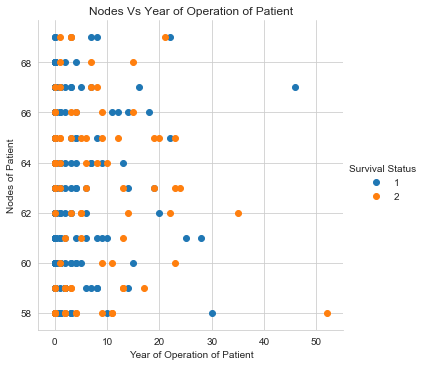

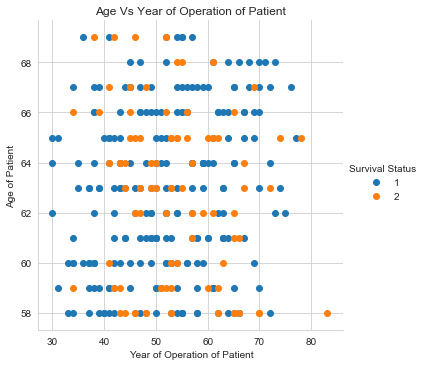

In [17]:
#2D scatter plot with colour

sns.set_style("whitegrid")
sns.FacetGrid(cancer, hue="status" , height= 5).map(plt.scatter , "age" , "nodes").add_legend(title="Survival Status");
plt.ylabel('Age of Patient')
plt.xlabel('Nodes of Patient')
plt.title('Age of patient Vs Nodes of Patient')

sns.FacetGrid(cancer, hue="status" , height= 5).map(plt.scatter , "nodes" , "year").add_legend(title="Survival Status");
plt.ylabel('Nodes of Patient')
plt.xlabel('Year of Operation of Patient')
plt.title('Nodes Vs Year of Operation of Patient')



sns.FacetGrid(cancer, hue="status" , height= 5).map(plt.scatter , "age" , "year").add_legend(title="Survival Status");
plt.ylabel('Age of Patient')
plt.xlabel('Year of Operation of Patient')
plt.title('Age Vs Year of Operation of Patient')
plt.show()

Observations:
1. Very difficult to separate survival rates. Attributes (age,nodes : age,year : year:nodes) have significant overlap. There is no chance of linear separability.

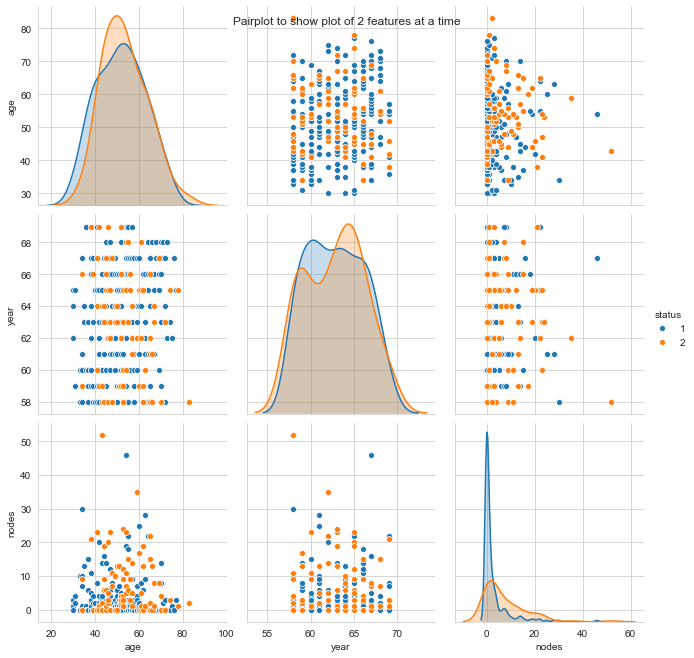

In [54]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(cancer , hue = "status" , height = 3);
plt.suptitle("Pairplot to show plot of 2 features at a time")
plt.show();

Observations:

Very difficult to separate survival rates. Attributes (age,nodes : age,year : year:nodes) have significant overlap. There is no chance of linear separability.

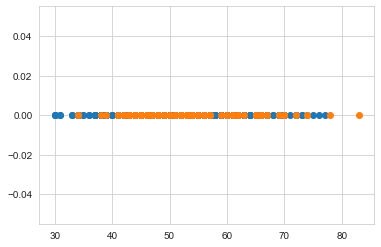

In [52]:
#1D scatter plot
import numpy as np
cancer_yes = cancer.loc[cancer["status"] == 1]
cancer_no = cancer.loc[cancer["status"] == 2]

plt.plot(cancer_yes["age"] , np.zeros_like(cancer_yes["age"]) , 'o')
plt.plot(cancer_no["age"] , np.zeros_like(cancer_no["age"]) , 'o')
plt.show()

#too much overlap

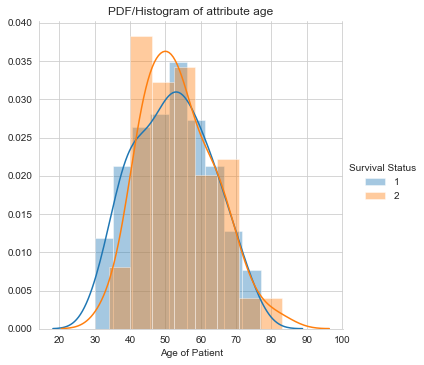

In [24]:
#Histogram , PDF and CDF

sns.FacetGrid(cancer , hue = "status" , height = 5).map(sns.distplot , "age").add_legend(title="Survival Status");
#plt.ylabel('Count of Age');
plt.xlabel('Age of Patient');
plt.title('PDF/Histogram of attribute age');
plt.show();

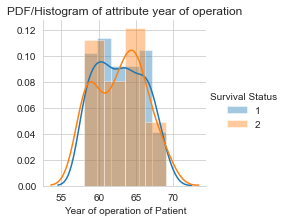

In [26]:
sns.FacetGrid(cancer , hue = "status" , height = 3).map(sns.distplot , "year").add_legend(title="Survival Status");
#plt.ylabel('Count of Age');
plt.xlabel('Year of operation of Patient');
plt.title('PDF/Histogram of attribute year of operation');
plt.show()

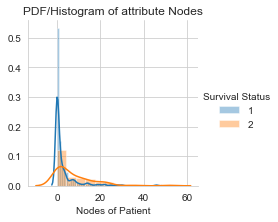

In [27]:
sns.FacetGrid(cancer, hue = "status" , height = 3).map(sns.distplot , "nodes").add_legend(title="Survival Status");
#plt.ylabel('Count of Age');
plt.xlabel('Nodes of Patient');
plt.title('PDF/Histogram of attribute Nodes');
plt.show()
#Although these is a significant amount of overlap , there is one observation

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


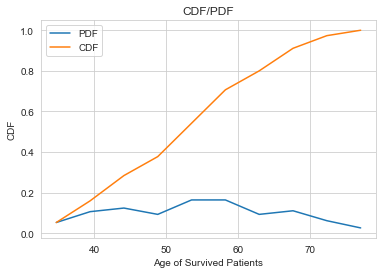

In [65]:
#CDF - Surviving patients
counts , bin_edges = np.histogram(cancer_yes["age"] , bins = 10 , density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:] , pdf , label = "PDF");
plt.plot(bin_edges[1:] , cdf , label = "CDF");
plt.xlabel("Age of Survived Patients")
plt.ylabel("CDF")
plt.legend()
plt.title("CDF/PDF")
plt.show()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


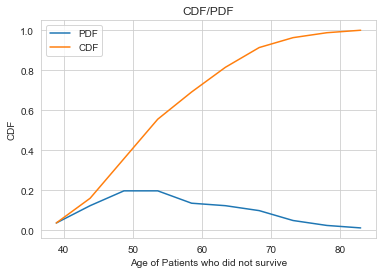

In [66]:
counts, bin_edges  = np.histogram(cancer_no["age"] , bins = 10 , density = True);
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:] , pdf, label = "PDF");
plt.plot(bin_edges[1:] , cdf,label = "CDF");
plt.xlabel("Age of Patients who did not survive")
plt.ylabel("CDF")
plt.title("CDF/PDF")
plt.legend()


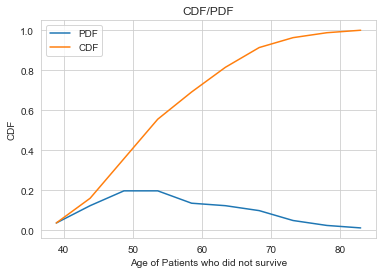

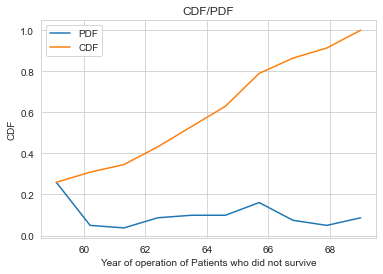

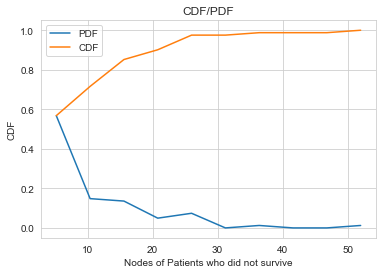

Plots of surviving people : 


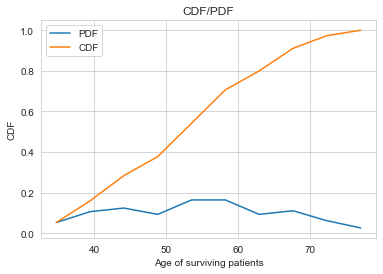

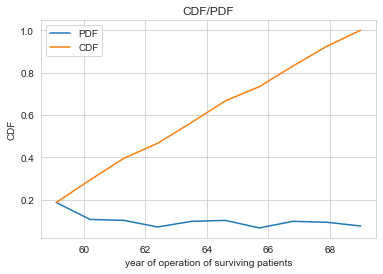

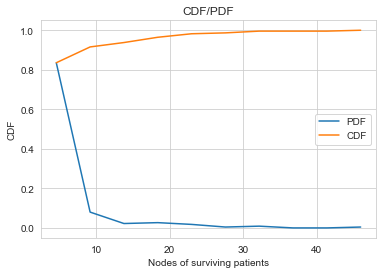

In [67]:
#counts , bin_edges = np.histogram (cancer_no["nodes"]  ,  bins = 10 , density = True)
#pdf = counts/(sum(counts))
#cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:], pdf);
#plt.plot(bin_edges[1:], cdf);

counts , bin_edges = np.histogram (cancer_no["age"]  ,  bins = 10 , density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF");
plt.plot(bin_edges[1:], cdf,label = "CDF");
plt.xlabel("Age of Patients who did not survive")
plt.ylabel("CDF")
plt.title("CDF/PDF")
plt.legend()

plt.show()
counts , bin_edges = np.histogram (cancer_no["year"]  ,  bins = 10 , density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF");
plt.plot(bin_edges[1:], cdf,label = "CDF");
plt.xlabel("Year of operation of Patients who did not survive")
plt.ylabel("CDF")
plt.title("CDF/PDF")
plt.legend()

plt.show()
counts , bin_edges = np.histogram (cancer_no["nodes"]  ,  bins = 10 , density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF");
plt.plot(bin_edges[1:], cdf,label = "CDF");
plt.xlabel("Nodes of Patients who did not survive")
plt.ylabel("CDF")
plt.title("CDF/PDF")
plt.legend()

plt.show()

print("Plots of surviving people : ")
counts , bin_edges = np.histogram (cancer_yes["age"]  ,  bins = 10 , density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF");
plt.plot(bin_edges[1:], cdf,label = "CDF");
plt.xlabel("Age of surviving patients")
plt.ylabel("CDF")
plt.title("CDF/PDF")
plt.legend()

plt.show()
counts , bin_edges = np.histogram (cancer_yes["year"]  ,  bins = 10 , density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF");
plt.plot(bin_edges[1:], cdf,label = "CDF");
plt.xlabel("year of operation of surviving patients")
plt.ylabel("CDF")
plt.title("CDF/PDF")
plt.legend()

plt.show()
counts , bin_edges = np.histogram (cancer_yes["nodes"]  ,  bins = 10 , density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF");
plt.plot(bin_edges[1:], cdf,label = "CDF");
plt.xlabel("Nodes of surviving patients")
plt.ylabel("CDF")
plt.title("CDF/PDF")
plt.legend()

plt.show()

In [22]:
print("means")
print(np.mean(cancer_yes["age"]))
print(np.mean(cancer_no["age"]))


print(np.mean(cancer_yes["nodes"]))
print(np.mean(cancer_no["nodes"]))


print(np.mean(cancer_yes["year"]))
print(np.mean(cancer_no["year"]))

print("Std")
print(np.std(cancer_yes["age"]))
print(np.std(cancer_no["age"]))


print(np.std(cancer_yes["nodes"]))
print(np.std(cancer_no["nodes"]))


print(np.std(cancer_yes["year"]))
print(np.std(cancer_no["year"]))


#print(np.std(iris_setosa["petal_length"]))
#print(np.std(iris_virginica["petal_length"]))
#print(np.std(iris_versicolor["petal_length"]))



means
52.01777777777778
53.67901234567901
2.7911111111111113
7.45679012345679
62.86222222222222
62.82716049382716
Std
10.98765547510051
10.10418219303131
5.857258449412131
9.128776076761632
3.2157452144021956
3.3214236255207883


In [29]:
print("\nMedians:")

print(np.median( cancer_yes["age"]))
print(np.median(cancer_no["age"]))

print(np.median( cancer_yes["nodes"]))
print(np.median(cancer_no["nodes"]))

print(np.median( cancer_yes["year"]))
print(np.median(cancer_no["year"]))

print("\nQuantiles:")
print(np.percentile(cancer_yes["age"],np.arange(0, 100, 25)))
print(np.percentile(cancer_no["age"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(cancer_yes["age"],90))
print(np.percentile(cancer_no["age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(cancer_yes["age"]))
print(robust.mad(cancer_no["age"]))



Medians:
52.0
53.0
0.0
4.0
63.0
63.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


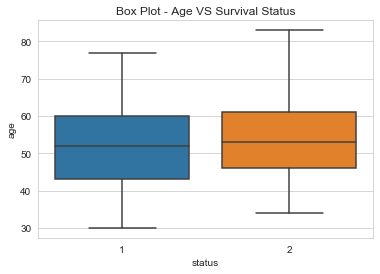

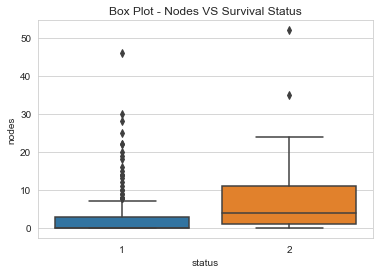

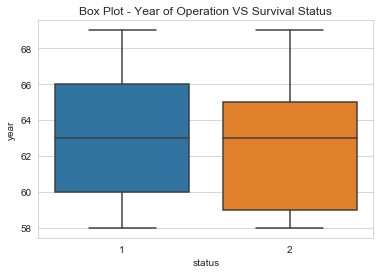

In [51]:
sns.boxplot(x= "status" , y = "age" , data = cancer)
plt.title("Box Plot - Age VS Survival Status")
plt.show()
sns.boxplot(x= "status" , y = "nodes" , data = cancer)
plt.title("Box Plot - Nodes VS Survival Status")
plt.show()
sns.boxplot(x= "status" , y = "year" , data = cancer)
plt.title("Box Plot - Year of Operation VS Survival Status")
plt.show()

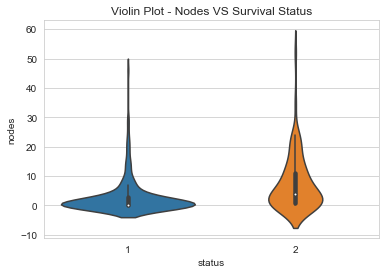

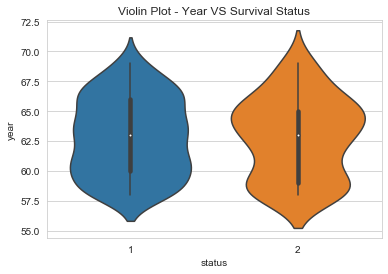

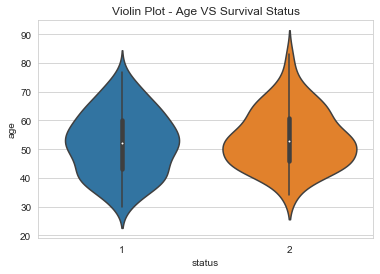

In [45]:
sns.violinplot(x = "status" , y = "nodes" , data = cancer , size = 8)
plt.title("Violin Plot - Nodes VS Survival Status")
plt.show()
sns.violinplot(x = "status" , y = "year" , data = cancer , size = 8)
plt.title("Violin Plot - Year VS Survival Status")
plt.show()
sns.violinplot(x = "status" , y = "age" , data = cancer , size = 8)
plt.title("Violin Plot - Age VS Survival Status")
plt.show()

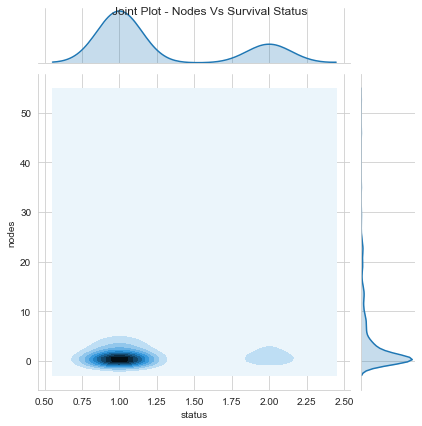

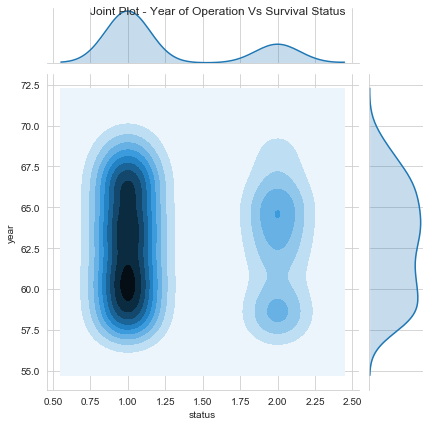

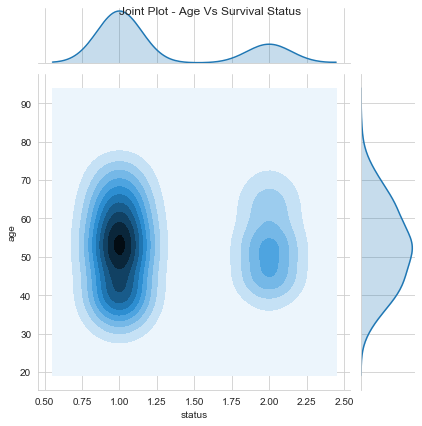

In [50]:
sns.jointplot(x= "status", y = "nodes", data=cancer, kind="kde").fig.suptitle("Joint Plot - Nodes Vs Survival Status");
sns.jointplot(x= "status", y = "year", data=cancer, kind="kde").fig.suptitle("Joint Plot - Year of Operation Vs Survival Status");
sns.jointplot(x= "status", y = "age", data=cancer, kind="kde").fig.suptitle("Joint Plot - Age Vs Survival Status");
plt.show();

Final Observations : 
1. There are 306 data points.
2. The dependent variable or the class attribute is status.
3. The data set is imbalanced.
4. Attributes are Age , Nodes and Year excluding the class atribute.
5. Very difficult to separate survival rates. Attributes (age,nodes : age,year : year:nodes) have significant overlap. There is no chance of linear separability.
6. Due to significant overlap the chance of person surviving cancer is not possible using Haberman's dataset.
7. Of all the people who died due to cancer , 60% had less than 4 nodes.
